####
- 20대 > 모집단: 3,343,638 샘플: 482
- 30대 > 모집단: 3,865,556 샘플: 378
- 40대 > 모집단: 4,275,961 샘플: 660
- 50대 > 모집단: 3,929,656 샘플: 808
- 60대+ > 모집단: 4,285,880 샘플: 1,056
- 전체 > 모집단: 23,651,820 샘플: 4,002

####
- GRP : 시청률의 총 합
- GRP/REACH 1+ : 광고를 본 사람들에게 광고 평균 노출 빈도 -> 77.8/32.8 : 광고를 접한 사람들의 평균 노출 빈도는 2.37회
- GRP/광고횟수 = 평균시청률

In [1]:
import pickle
import warnings
import platform
from matplotlib import font_manager, rc


plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~~')
    
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
def converter(model_name):
    for key, value in model_names.items():
        if model_name == key:
            model_name = value
            
    if type(model_name) == list:
        model_name = ", ".join(model_name)
    return model_name

In [3]:
model_names = {'BMW미니JCW클럽맨&컨트리맨': ["MINI-MINI Cooper Clubman", "MINI-MINI Cooper Countryman"],
'아우디Q8': "Audi-Q8", "볼보*": "Volvo-*", "포드레인저": "Ford-Ranger", "한국토요타시에나": "Toyota-Sienna Limited",
'FMK마세라티': "Maserati-*", "아우디A4": "Audi-A4", "아우디A6아반트&A4": "Audi-A6 Avant",
 "아우디A6아반트&A4": ["Audi-A6 Avant", "Audi-A4"], "폭스바겐골프": "Volkswagen-Golf",
 "닛산인피니티Q30": "Infiniti-Q30", "한국토요타렉서스LC500H": "Lexus-LC500h",
 "BMWM5": "BMW-M5", "벤츠EQ": "Mercedes-Benz-EQC 400",
 "한국토요타렉서스LS500": "Lexus-LS500", "볼보XC40": "Volvo-XC40",
 "FCA지프체로키&그랜드체로키": ["Chrysler-Jeep Cherokee", "Chrysler-Jeep Grand Cherokee"],
 "아우디Q": "Audi-Q*", "한국토요타렉서스GSF": "Lexus-GS F",
 "닛산알티마": "Nissan-Altima", "BMW미니쿠퍼": "MINI-MINI Cooper",
 "아우디A4&A5*": ["Audi-A4", "Audi-A5"], "아우디A5": "Audi-A5",
 "재규어랜드로버레인지로버이보크": "Land Rover-Range Rover Evoque",
 "한국토요타GR수프라": "Toyota-GR Supra", "한국토요타렉서스GS450H": "Lexus-GS450h",
 "벤츠C클래스카브리올레": "Mercedes-Benz-C 200 Cabriolet",
 "크라이슬러지프컴패스": "Chrysler-Jeep Compass",
 "링컨에비에이터": "Ford-Lincoln Aviator",
 "재규어랜드로버레인지로버이보크컨버터블": "Land Rover-Range Rover Evoque Convertible",
 "벤츠CLS": "Mercedes-Benz-CLS", "볼보S60*": "Volvo-S60",
 "한국토요타캠리&프리우스": ["Toyota-Camry", "Toyota-Prius"],
 "더클래스효성벤츠E클래스": "Mercedes-Benz-E*",
 "BMW6시리즈그란투리스모": "Maserati-GranTurismo",
 "더클래스효성벤츠GLE쿠페": "Mercedes-Benz-GLE *Coupe",
 "더클래스효성벤츠S클래스": "Mercedes-Benz-S*",
 "재규어랜드로버디펜더": "Land Rover-Defender",
 "아우디A8": "Audi-A8", "재규어XE": "Jaguar-XE", "BMWX3": "BMW-X3",
 "한불모터스푸조5008": "Peugeot-5008", "아우디폭스바겐제타": "Volkswagen-Jetta"}

no_search_model_names = {'기흥애스턴마틴밴티지', '기흥인터내셔널애스턴마틴', '벤츠S350DAMG', '한국토요타렉서스SUV', '벤츠SUV', '비워크지프', "FMK마세라티SUV", "도이치모터스BMW"}

---

---

In [5]:
datas = pd.read_csv('datas/TV_GRPs_by_models_v2.csv')

datas = datas.iloc[:-2, :]
datas.tail()

,년,월,Advertiser,Product,연령대,광고횟수,시청자수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+
6289,2020.0,10월,혼다코리아,혼다CR-V,30대,27.0,9939.0,0.3,9939.0,0.3,0.0,0.0,0.0,0.0
6290,2020.0,10월,혼다코리아,혼다CR-V,40대,27.0,32944.0,0.8,27119.0,0.7,0.0,0.0,0.0,0.0
6291,2020.0,10월,혼다코리아,혼다CR-V,50대,27.0,35197.0,0.9,25964.0,0.6,0.0,0.0,0.0,0.0
6292,2020.0,10월,혼다코리아,혼다CR-V,60대,27.0,36975.0,0.8,19556.0,0.4,0.1,0.1,0.0,0.0
6293,2020.0,10월,혼다코리아,혼다CR-V,개인,27.0,115055.0,0.5,82280.0,0.3,0.0,0.0,0.0,0.0


In [6]:
datas["월"] = datas["월"].replace({"01월": "1월", "101월": "11월", "102월": "12월"})
datas.rename(columns={"년": "Year", "월": "Month"}, inplace=True)

In [7]:
datas['Year'] = datas['Year'].astype('int')
datas['Year'] = datas['Year'].astype('str')

datas["Month"] = datas['Month'].apply(lambda x: x[:-1]).astype('int')

In [8]:
datas['Year'] = pd.to_datetime(datas['Year'], format="%Y", errors='raise')
datas['Month'] = pd.to_datetime(datas['Month'], format="%m", errors='raise')

datas['Year'] = datas['Year'].dt.year
datas['Month'] = datas["Month"].dt.month

datas.sort_values(["Year", "Month"], inplace=True)

datas['date'] = datas['Year'].astype(str) + "-" + datas['Month'].astype(str)

In [9]:
datas = datas[['date', 'Year', 'Month', 'Advertiser', 'Product', '연령대', '광고횟수', 'GRP',
              '도달자수', '도달율 1+', '도달율 3+', "도달율 5+", "도달율 7+", '도달율 9+']]

In [10]:
datas['평균시청률'] = datas['GRP'] / datas['광고횟수']

In [11]:
ad_count = datas.groupby("Advertiser").size().reset_index(name='count')
ad_count.sort_values('count', ascending=False, inplace=True)

avg_view = datas.groupby('Advertiser').agg('mean')[['평균시청률']].reset_index()
avg_view.sort_values('평균시청률', ascending=False, inplace=True)


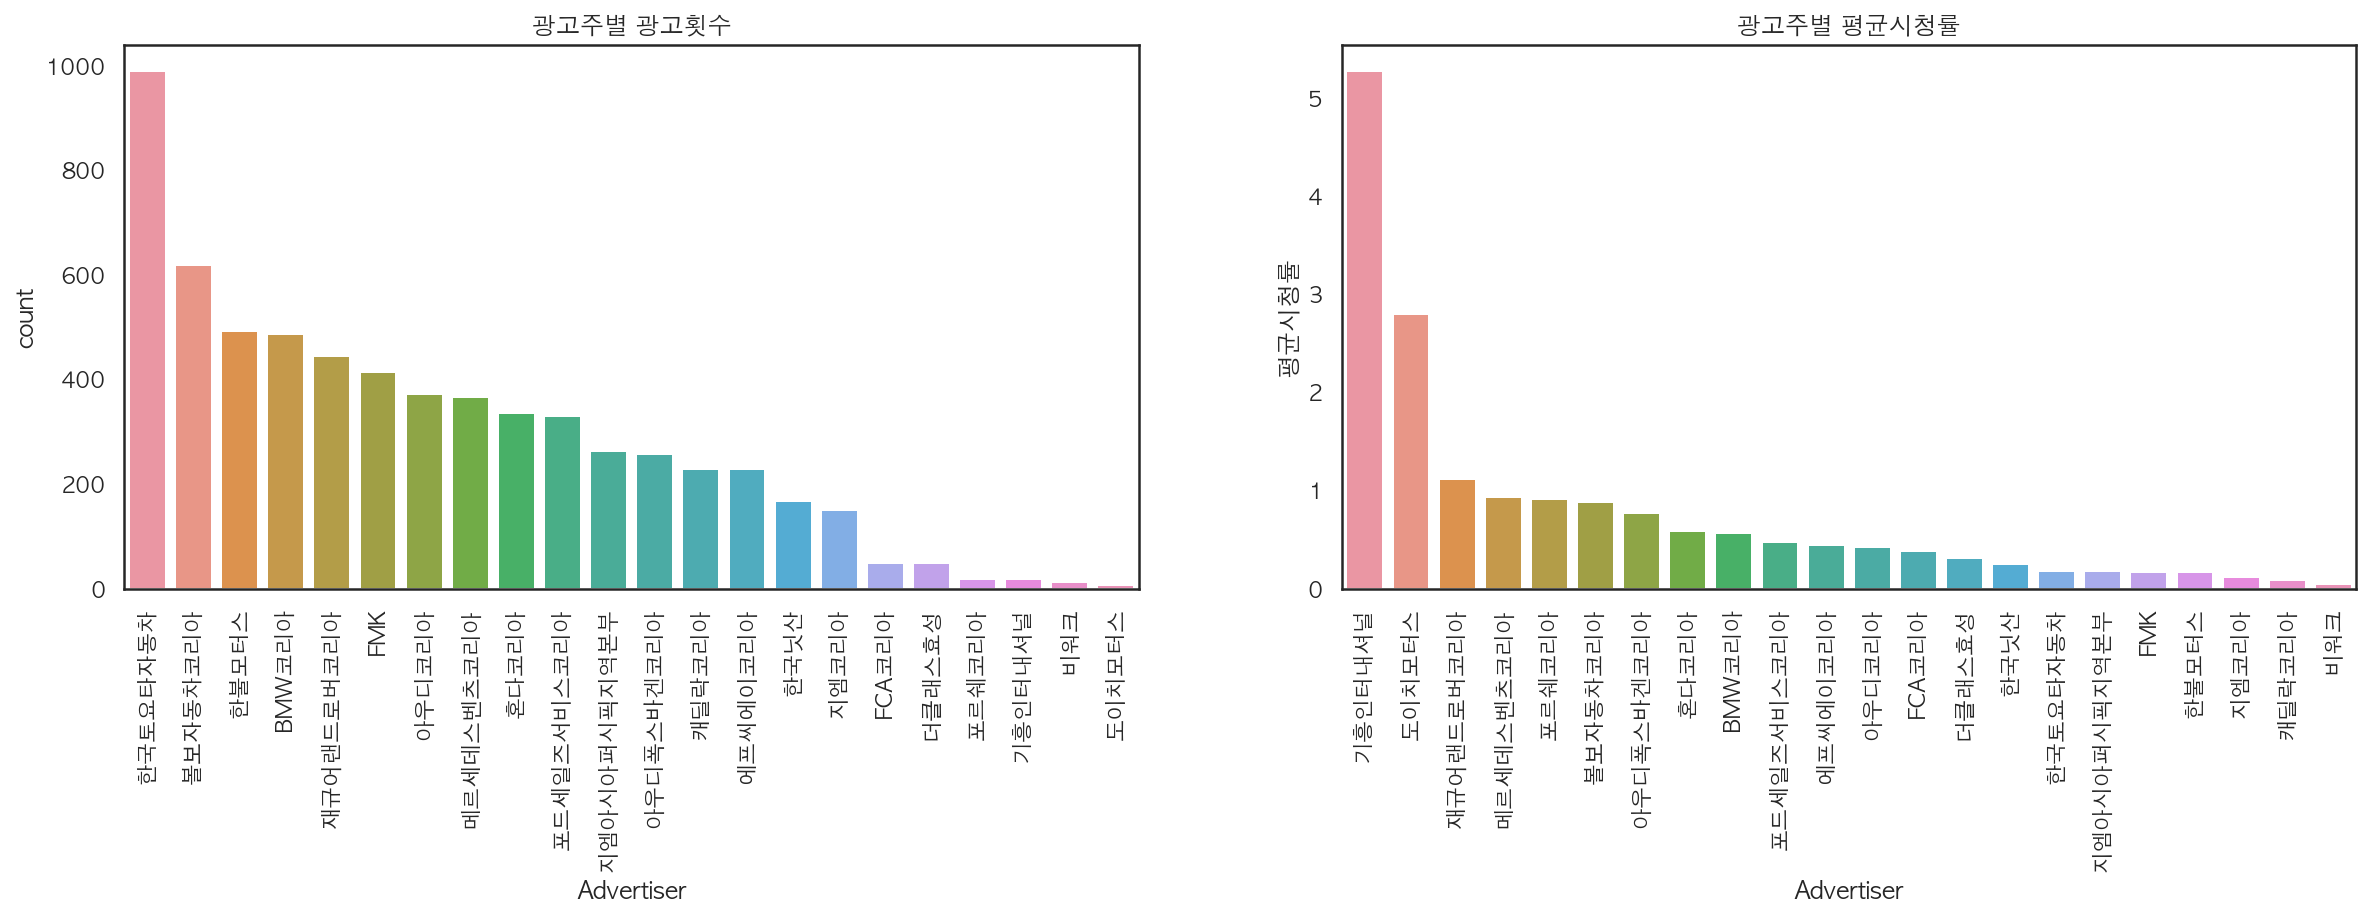

In [12]:
plt.figure(figsize=(20, 5))

plt.subplot(121)
sns.barplot(data=ad_count, x="Advertiser", y='count')
plt.xticks(rotation=90)
plt.title('광고주별 광고횟수')

plt.subplot(122)
sns.barplot(data=avg_view, x='Advertiser', y='평균시청률')
plt.xticks(rotation=90)
plt.title('광고주별 평균시청률')

plt.show()

- 광고는 한국토요타자동차가 가장 많이 했지만 평균시청률은 기흥인터내셔널이 가장 높게 나타났다 : 광고횟수와 평균시청률은 비례하지 않음

In [13]:
datas['평균노출빈도'] = datas['GRP'] / datas['도달율 1+']
datas['평균노출빈도'].fillna(0, inplace=True)
datas['평균노출빈도'].replace(np.inf, 0, inplace=True)
datas.tail()

,date,Year,Month,Advertiser,Product,연령대,광고횟수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균시청률,평균노출빈도
2233,2021-4,2021,4,혼다코리아,혼다CR-V,30대,498.0,20.8,535073.0,14.5,1.5,0.2,0.1,0.1,0.041767,1.434483
2234,2021-4,2021,4,혼다코리아,혼다CR-V,40대,498.0,38.4,890827.0,21.6,4.4,0.2,0.0,0.0,0.077108,1.777778
2235,2021-4,2021,4,혼다코리아,혼다CR-V,50대,498.0,73.9,1370128.0,33.5,9.9,2.2,0.8,0.4,0.148394,2.205970
2236,2021-4,2021,4,혼다코리아,혼다CR-V,60대,498.0,106.1,2194754.0,43.3,15.8,5.3,1.9,0.7,0.213052,2.450346
2237,2021-4,2021,4,혼다코리아,혼다CR-V,개인,498.0,49.1,5573971.0,23.1,6.5,1.7,0.6,0.2,0.098594,2.125541


In [13]:
datas[datas.values == np.inf]

,date,Year,Month,Advertiser,Product,연령대,광고횟수,GRP,도달자수,도달율 1+,도달율 3+,도달율 5+,도달율 7+,도달율 9+,평균시청률,평균노출빈도


In [14]:
ad_age = datas.groupby(["Advertiser", "연령대"]).agg('mean').round(6)[['GRP', '평균시청률', '평균노출빈도']].reset_index()
ad_age.tail()

,Advertiser,연령대,GRP,평균시청률,평균노출빈도
127,혼다코리아,30대,28.196429,0.434702,1.525901
128,혼다코리아,40대,50.917857,0.773733,1.840891
129,혼다코리아,50대,58.366071,0.860406,1.964544
130,혼다코리아,60대,55.069643,0.664354,1.921900
131,혼다코리아,개인,38.912500,0.546491,1.834624


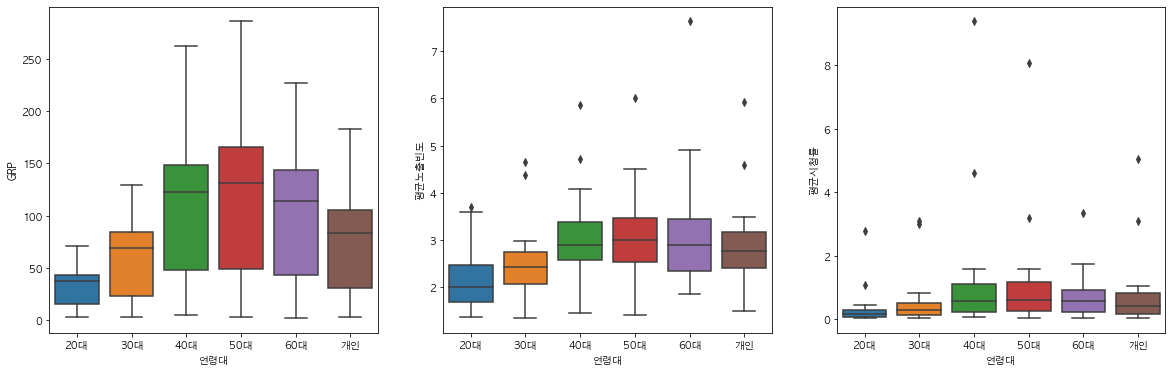

In [15]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.boxplot(data=ad_age, x='연령대', y='GRP')

plt.subplot(132)
sns.boxplot(data=ad_age, x="연령대", y='평균노출빈도')

plt.subplot(133)
sns.boxplot(data=ad_age, x="연령대", y='평균시청률')

plt.show()

- 20, 30대보다 40 ~ 60대 연령층이 자동차 광고의 노출정도가 높다고 볼 수 있다.

In [128]:
yearly_grp = datas.groupby(['Year', '연령대']).sum()['GRP'].reset_index()
yearly_grp = yearly_grp[yearly_grp['Year'] != 2021]

In [129]:
from sklearn.preprocessing import MinMaxScaler

yearly_grp['mm_value'] = np.zeros((len(yearly_grp), 1))

for age in yearly_grp['연령대'].unique():
    yearly_grp['mm_value'][yearly_grp['연령대'] == age] = MinMaxScaler().fit_transform(yearly_grp[yearly_grp['연령대'] == age]['GRP'].values.reshape(-1, 1)).flatten()

20대
30대
40대
50대
60대
개인


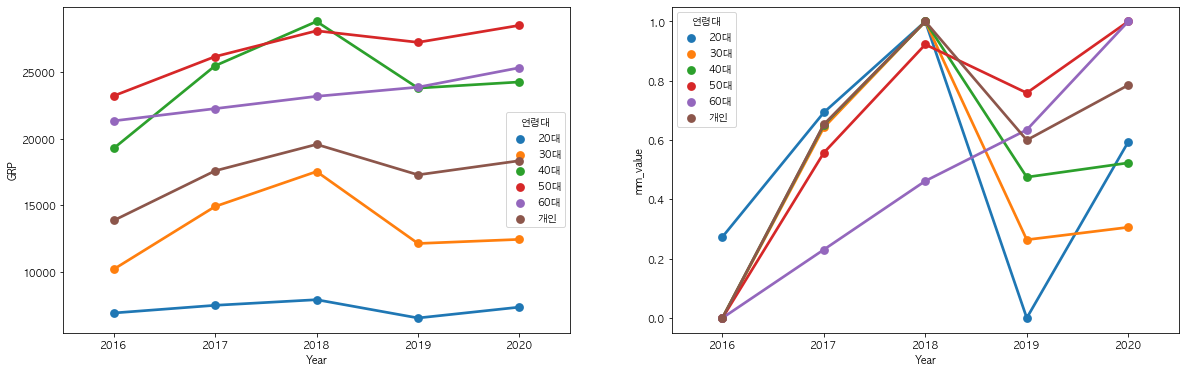

In [131]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
sns.pointplot(data=yearly_grp, x='Year', y='GRP', hue='연령대')

plt.subplot(122)
sns.pointplot(data=yearly_grp, x='Year', y='mm_value', hue='연령대')

plt.show()

- 50 ~ 60 대 연령층이 꾸준히 자동차에 대한 관심도가 증가하는 것을 볼 수 있다.